# Jupyter Data Science Workflow

## From exploratory analysis to reproducible science

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
import os
from urllib.request import urlretrieve
import pandas as pd

URL = 'https://data.seattle.gov/api/views/47yq-6ugv/rows.csv?accessType=DOWNLOAD'

def get_bicycle_traffic_data(filename='greenway.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('greenway.csv', index_col='Date',parse_dates=True)
    data.columns = ('Total', 'East', 'West')
    return data

In [3]:
data = get_bicycle_traffic_data()
data.head()

,Total,East,West
Date,,,
2014-01-01 00:00:00,18.0,6.0,12.0
2014-01-01 01:00:00,6.0,3.0,3.0
2014-01-01 02:00:00,3.0,0.0,3.0
2014-01-01 03:00:00,4.0,2.0,2.0
2014-01-01 04:00:00,5.0,3.0,2.0


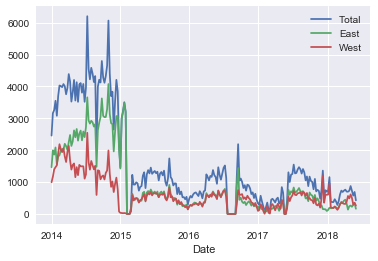

In [5]:
data.resample('W').sum().plot();

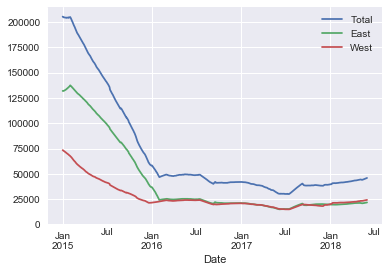

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

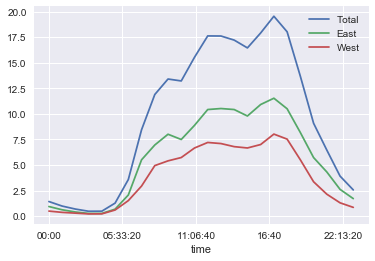

In [7]:
data.groupby(data.index.time).mean().plot();

In [8]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05
00:00:00,18.0,3.0,7.0,8.0,5.0
01:00:00,6.0,2.0,1.0,2.0,2.0
02:00:00,3.0,0.0,0.0,4.0,3.0
03:00:00,4.0,4.0,6.0,4.0,4.0
04:00:00,5.0,1.0,0.0,4.0,4.0


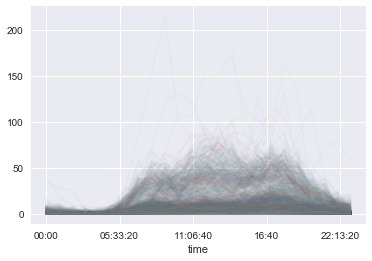

In [9]:
pivoted.plot(legend=False, alpha=0.03);